# 무비렌즈 데이터

- 추천 시스템에 사용될 모델 학습을 위해서는 데이터가 필요하다. 먼저 가장 많은 예제로 사용되는 무비렌즈 데이터를 살펴보자.
- 무비렌즈 데이터를 추천 모델 학습에 필요한 형태로 가공해본다.

## 데이터 특징

- 유저가 영화에 내린 평점 데이터가 있으며, 주로 사용하게 될 데이터임.
- 영화에 대한 제목, 장르, 연도 등의 데이터가 있음.
- 유저에 대한 성별, 연령, 직업, 주소 등의 데이터가 있음.
- Explicit Feedback: 유저가 아이템에 대한 선호도를 1.0 ~ 5.0 사이의 점수로 직접 표현함.

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot as plt
from datetime import datetime
from google.colab import drive
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/recomm_study/recomm_code/Recommend_learningspoons/data/ml-100k-20220921T022842Z-001/ml-100k/'
ratings_df = pd.read_csv(path + 'u.data', sep='\t', encoding='latin-1', header=None)
movies_df = pd.read_csv(path + 'u.item', sep='|', encoding='latin-1', header=None)
users_df = pd.read_csv(path + 'u.user', sep='|', encoding='latin-1', header=None)

- movielens 100k dataset 설명 [링크](https://grouplens.org/datasets/movielens/100k/)

In [ ]:
ratings_df.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [ ]:
movies_df.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
                     'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                     'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                     'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                     'Thriller', 'War', 'Western'] 

In [ ]:
users_df.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

In [ ]:
print(ratings_df.shape)
ratings_df[:10]

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [ ]:
print(movies_df.shape)
movies_df[:10]

(1682, 24)


,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- timestamp를 datetime으로 바꿔줌.
- 추천문제에서 보통 과거 데이터를 학습해서 현재 혹은 미래에 추천하기 때문에 시간은 트레이닝 데이터와 테스트 데이터를 나눌 때 중요하게 사용된다.

In [ ]:
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['date'] = ratings_df['datetime'].dt.strftime('%Y-%m-%d').astype(str)
ratings_df.head()

,user_id,movie_id,rating,timestamp,datetime,date
0,196,242,3,881250949,1997-12-04 15:55:49,1997-12-04
1,186,302,3,891717742,1998-04-04 19:22:22,1998-04-04
2,22,377,1,878887116,1997-11-07 07:18:36,1997-11-07
3,244,51,2,880606923,1997-11-27 05:02:03,1997-11-27
4,166,346,1,886397596,1998-02-02 05:33:16,1998-02-02


### 평점 데이터의 기초 통계량
- 데이터에 대한 기본적인 통계정보를 확인한다.
- 몇가지 지표에 대해서 Visualize 해본다.

In [ ]:
num_user = len(ratings_df['user_id'].unique())
num_movie = len(ratings_df['movie_id'].unique())
print(f'사용자 수 : {num_user}, \t 영화 수 : {num_movie}')

사용자 수 : 943, 	 영화 수 : 1682


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   movie_id   100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  int64         
 4   datetime   100000 non-null  datetime64[ns]
 5   date       100000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 4.6+ MB


In [ ]:
# pandas에서 제공하는 기초 통계량
# user_id, movie_id는 애초에 category이므로
# rating에 대해서만 볼 것...
ratings_df[['user_id', 'movie_id', 'rating']].describe()

,user_id,movie_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


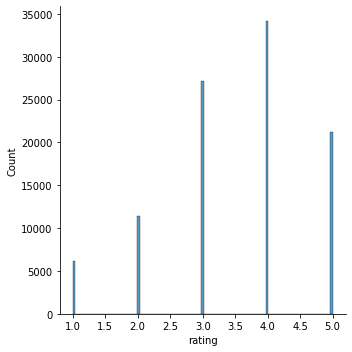

In [ ]:
# 평점 데이터 분포
sns.displot(ratings_df['rating'])

In [ ]:
# user_id 별로 aggregate한 데이터 확인
# avgRating : user_id별 평균평점
# stdRating : user_id별 평점의 표준편차

user_statistics = pd.DataFrame({
    'numRating' : ratings_df.groupby('user_id')['movie_id'].nunique(),
    'avgRating' : ratings_df.groupby('user_id')['rating'].mean(),
    'stdRating' : ratings_df.groupby('user_id')['rating'].std()
}).reset_index()

user_statistics.head()

,user_id,numRating,avgRating,stdRating
0,1,272,3.610294,1.263585
1,2,62,3.709677,1.030472
2,3,54,2.796296,1.219026
3,4,24,4.333333,0.916831
4,5,175,2.874286,1.362963


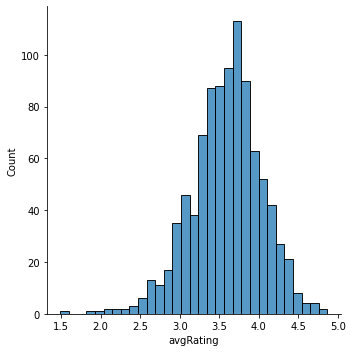

In [ ]:
# user_id별 평균 평점 분포
sns.displot(user_statistics['avgRating'])

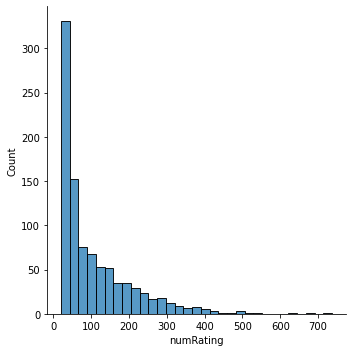

In [ ]:
# user별 평가 영화 개수
sns.displot(user_statistics['numRating'])

## 인기도 기반 영화 추천 (Popular, Highly Rated)
- Popular: 가장 많은 유저가 본 영화 (혹은 평가를 받은 영화)
- Highly Rated: 가장 높은 평점을 받은 영화

In [ ]:
# 영화 Ranking을 위한 영화별 통계량 계산
movie_statistics = pd.DataFrame({
    'numUsers' : ratings_df.groupby('movie_id')['user_id'].nunique(),
    'avgRating' : ratings_df.groupby('movie_id')['rating'].mean(),
    'stdRating' : ratings_df.groupby('movie_id')['rating'].std()
    }).reset_index()

movie_statistics.head()

,movie_id,numUsers,avgRating,stdRating
0,1,452,3.878319,0.927897
1,2,131,3.206107,0.966497
2,3,90,3.033333,1.212760
3,4,209,3.550239,0.965069
4,5,86,3.302326,0.946446


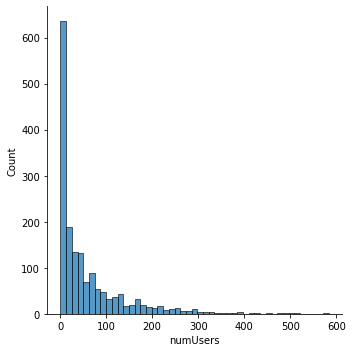

In [ ]:
# 영화별 평가 개수 분포
sns.displot(movie_statistics['numUsers'])

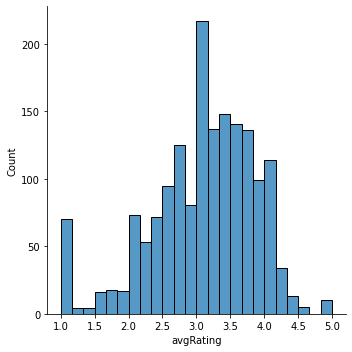

In [ ]:
# 영화별 평균 평점의 분포
sns.displot(movie_statistics['avgRating'])

### Popluar
- 사실 무비렌즈 데이터의 경우 Popular로 랭킹하기에 적합하지 않지만 실습을 위해서 진행한다.

In [ ]:
# 가장 많은 유저가 본 영화 Top 10
top10_df = movie_statistics.sort_values(by='numUsers', ascending=False)[:10]
pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on='movie_id')

,movie_id,numUsers,avgRating,stdRating,movie_title,release_date
0,50,583,4.358491,0.881341,Star Wars (1977),01-Jan-1977
1,258,509,3.803536,0.994427,Contact (1997),11-Jul-1997
2,100,508,4.155512,0.975756,Fargo (1996),14-Feb-1997
3,181,507,4.007890,0.923955,Return of the Jedi (1983),14-Mar-1997
4,294,485,3.156701,1.098544,Liar Liar (1997),21-Mar-1997
5,286,481,3.656965,1.169401,"English Patient, The (1996)",15-Nov-1996
6,288,478,3.441423,1.113910,Scream (1996),20-Dec-1996
7,1,452,3.878319,0.927897,Toy Story (1995),01-Jan-1995
8,300,431,3.631090,0.998072,Air Force One (1997),01-Jan-1997
9,121,429,3.438228,1.116584,Independence Day (ID4) (1996),03-Jul-1996


### Highly rated

In [ ]:
# 평점이 가장 높은 영화 Top 10 (Highly Rated)
top10_df = movie_statistics.sort_values(by='avgRating', ascending=False)[:10]
pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on='movie_id')

,movie_id,numUsers,avgRating,stdRating,movie_title,release_date
0,814,1,5.0,NaN,"Great Day in Harlem, A (1994)",01-Jan-1994
1,1599,1,5.0,NaN,Someone Else's America (1995),10-May-1996
2,1201,1,5.0,NaN,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996
3,1122,1,5.0,NaN,They Made Me a Criminal (1939),01-Jan-1939
4,1653,1,5.0,NaN,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996
5,1293,3,5.0,0.0,Star Kid (1997),16-Jan-1998
6,1500,2,5.0,0.0,Santa with Muscles (1996),08-Nov-1996
7,1189,3,5.0,0.0,Prefontaine (1997),24-Jan-1997
8,1536,1,5.0,NaN,Aiqing wansui (1994),22-Jul-1996
9,1467,2,5.0,0.0,"Saint of Fort Washington, The (1993)",01-Jan-1993


In [ ]:
# 평점 Top10 with 사용자 수 Threshold 만들기
# numUsers가 10명 이상이어야 함
top10_df = movie_statistics[movie_statistics['numUsers'] > 10].sort_values(by='avgRating', ascending=False)[:10]
pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on='movie_id')

,movie_id,numUsers,avgRating,stdRating,movie_title,release_date
0,408,112,4.491071,0.771047,"Close Shave, A (1995)",28-Apr-1996
1,318,298,4.466443,0.829109,Schindler's List (1993),01-Jan-1993
2,169,118,4.466102,0.823607,"Wrong Trousers, The (1993)",01-Jan-1993
3,483,243,4.456790,0.728114,Casablanca (1942),01-Jan-1942
4,114,67,4.447761,0.764429,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996
5,64,283,4.445230,0.767008,"Shawshank Redemption, The (1994)",01-Jan-1994
6,603,209,4.387560,0.712551,Rear Window (1954),01-Jan-1954
7,12,267,4.385768,0.825500,"Usual Suspects, The (1995)",14-Aug-1995
8,50,583,4.358491,0.881341,Star Wars (1977),01-Jan-1977
9,178,125,4.344000,0.719588,12 Angry Men (1957),01-Jan-1957


### Steam Rating
* Steam에서 평점을 매기는 방식을 차용한듯

In [ ]:
movie_statistics['steamRating'] = movie_statistics['avgRating'] - (movie_statistics['avgRating'] - 3.0) \
                                  * np.power(2, -np.log10(movie_statistics['numUsers']))
top10_df = movie_statistics.sort_values(by='steamRating', ascending=False)[:10]
pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on='movie_id')

,movie_id,numUsers,avgRating,stdRating,steamRating,movie_title,release_date
0,318,298,4.466443,0.829109,4.202535,Schindler's List (1993),01-Jan-1993
1,64,283,4.445230,0.767008,4.181064,"Shawshank Redemption, The (1994)",01-Jan-1994
2,483,243,4.456790,0.728114,4.178012,Casablanca (1942),01-Jan-1942
3,50,583,4.358491,0.881341,4.158731,Star Wars (1977),01-Jan-1977
4,408,112,4.491071,0.771047,4.130806,"Close Shave, A (1995)",28-Apr-1996
5,12,267,4.385768,0.825500,4.127995,"Usual Suspects, The (1995)",14-Aug-1995
6,169,118,4.466102,0.823607,4.117391,"Wrong Trousers, The (1993)",01-Jan-1993
7,603,209,4.387560,0.712551,4.109705,Rear Window (1954),01-Jan-1954
8,98,390,4.289744,0.836597,4.075694,"Silence of the Lambs, The (1991)",01-Jan-1991
9,127,413,4.283293,0.934577,4.073956,"Godfather, The (1972)",01-Jan-1972


### 휴리스틱 랭킹 스코어

- Popular와 Higly Rated를 모두 고려하고 싶다면?
- 각 Ranking 스코어를 조합하여 휴리스틱한 스코어를 만든다.
- 보통 Popular 스코어는 크게 증가하기 때문에 log함수를 사용하고, rating 스코어는 지수를 사용해서 그 정도를 조정한다.

In [ ]:
# 평점과 영화를 본 유저수를 모두 고려한 휴리스틱 스코어
# score = log(numUsers) X (avgRating)^alpha
# alpha -> 0.1, 0.8, 10 모두 비교해보기

alpha = 0.8

movie_statistics['huristic_score'] = np.log(movie_statistics['numUsers']) * np.power(movie_statistics['avgRating'], alpha)
top10_df = movie_statistics.sort_values(by='huristic_score', ascending=False)[:10]
pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on='movie_id')

,movie_id,numUsers,avgRating,stdRating,steamRating,huristic_score,movie_title,release_date
0,50,583,4.358491,0.881341,4.158731,20.676866,Star Wars (1977),01-Jan-1977
1,100,508,4.155512,0.975756,3.978408,19.472478,Fargo (1996),14-Feb-1997
2,127,413,4.283293,0.934577,4.073956,19.287119,"Godfather, The (1972)",01-Jan-1972
3,174,420,4.252381,0.891819,4.049117,19.229190,Raiders of the Lost Ark (1981),01-Jan-1981
4,98,390,4.289744,0.836597,4.075694,19.126654,"Silence of the Lambs, The (1991)",01-Jan-1991
5,181,507,4.007890,0.923955,3.853320,18.911102,Return of the Jedi (1983),14-Mar-1997
6,318,298,4.466443,0.829109,4.202535,18.863522,Schindler's List (1993),01-Jan-1993
7,172,367,4.204360,0.922803,4.000789,18.629723,"Empire Strikes Back, The (1980)",01-Jan-1980
8,313,350,4.245714,0.946822,4.032126,18.625375,Titanic (1997),01-Jan-1997
9,64,283,4.445230,0.767008,4.181064,18.621458,"Shawshank Redemption, The (1994)",01-Jan-1994


## 장르별 추천

- 전체 영화에 대하여 랭킹을 구할수도 있지만, 장르별로 평점의 분포와 경향성이 다르기 때문에 장르 내에서 랭킹을 수행하기도 한다.
- 먼저 장르별 평점 평균과 분포를 구해보자

In [ ]:
genre_list = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
              'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [ ]:
result = []

rating_with_genre = pd.merge(ratings_df, movies_df, how='inner', on='movie_id')

for genre in genre_list:
  '''
  numUser -> 장르별 평점을 매긴(영화를 본) 유저의 수
  avg -> 장르별 평균 평점
  std -> 장르별 평점 표준편차
  '''
  numUser = rating_with_genre[rating_with_genre[genre] == 1]['rating'].count()
  avg = rating_with_genre[rating_with_genre[genre] == 1]['rating'].mean()
  std = rating_with_genre[rating_with_genre[genre] == 1]['rating'].std()
  result.append([numUser, avg, std])

genre_statistics = pd.DataFrame(result, index=genre_list, columns=['numUsers', 'avgRating', 'stdRating'])
genre_statistics.sort_values(by='avgRating', ascending=False)

,numUsers,avgRating,stdRating
Film-Noir,1733,3.921523,0.993433
War,9398,3.815812,1.080271
Drama,39895,3.687379,1.079125
Documentary,758,3.672823,1.180455
Mystery,5245,3.638132,1.091117
Crime,8055,3.632278,1.112540
Romance,19461,3.621705,1.096125
Western,1854,3.613269,1.041946
Animation,3605,3.576699,1.096615
Sci-Fi,12730,3.560723,1.133190


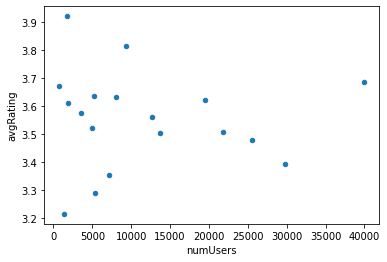

In [ ]:
genre_statistics.plot.scatter(x='numUsers', y='avgRating')

In [ ]:
# 장르별로 SteamRating으로 Top-10 구하기
genre = "Action"
# genre = "Fantasy"
# genre = "Romance"

movie_statistics_with_genre = pd.merge(movie_statistics, movies_df, how='inner', on='movie_id')
top10_genre = movie_statistics_with_genre[movie_statistics_with_genre[genre] == 1].sort_values(by='steamRating', ascending=False)[:10]
top10_genre

,movie_id,numUsers,avgRating,stdRating,steamRating,huristic_score,movie_title,release_date,video_release_date,IMDb_URL,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
49,50,583,4.358491,0.881341,4.158731,20.676866,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,...,0,0,0,0,0,1,1,0,1,0
126,127,413,4.283293,0.934577,4.073956,19.287119,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",...,0,0,0,0,0,0,0,0,0,0
173,174,420,4.252381,0.891819,4.049117,19.229190,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,...,0,0,0,0,0,0,0,0,0,0
312,313,350,4.245714,0.946822,4.032126,18.625375,Titanic (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,...,0,0,0,0,0,1,0,0,0,0
171,172,367,4.204360,0.922803,4.000789,18.629723,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,...,0,0,0,0,0,1,1,0,1,0
172,173,324,4.172840,0.998948,3.967019,18.127130,"Princess Bride, The (1987)",01-Jan-1987,NaN,http://us.imdb.com/M/title-exact?Princess%20Br...,...,0,0,0,0,0,1,0,0,0,0
514,515,201,4.203980,0.901767,3.960037,16.729198,"Boot, Das (1981)",04-Apr-1997,NaN,"http://us.imdb.com/M/title-exact?Boot,%20Das%2...",...,0,0,0,0,0,0,0,0,1,0
186,187,209,4.186603,0.919141,3.948989,16.796565,"Godfather: Part II, The (1974)",01-Jan-1974,NaN,http://us.imdb.com/M/title-exact?Godfather:%20...,...,0,0,0,0,0,0,0,0,0,0
21,22,297,4.151515,0.962440,3.944074,17.781252,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,...,0,0,0,0,0,0,0,0,1,0
497,498,152,4.184211,0.758362,3.923218,15.788109,"African Queen, The (1951)",01-Jan-1951,NaN,http://us.imdb.com/M/title-exact?African%20Que...,...,0,0,0,0,0,1,0,0,1,0


## 사용자 데모그래픽을 활용한 추천

In [ ]:
# 사용자 데모그래픽에 따라 선호도가 다른 것은 상식이다
# 실제로 그런지 데이터를 살펴보자

demo_ratings_df = pd.merge(ratings_df, users_df, how='inner', on='user_id')
demo_ratings_df.head()

,user_id,movie_id,rating,timestamp,datetime,date,age,gender,occupation,zip_code
0,196,242,3,881250949,1997-12-04 15:55:49,1997-12-04,49,M,writer,55105
1,196,393,4,881251863,1997-12-04 16:11:03,1997-12-04,49,M,writer,55105
2,196,381,4,881251728,1997-12-04 16:08:48,1997-12-04,49,M,writer,55105
3,196,251,3,881251274,1997-12-04 16:01:14,1997-12-04,49,M,writer,55105
4,196,655,5,881251793,1997-12-04 16:09:53,1997-12-04,49,M,writer,55105


In [ ]:
def age_map(x):
  if x < 20:
    return 10
  elif x >= 20 and x < 30:
    return 20
  elif x >= 30 and x < 40:
    return 30
  elif x >= 40 and x < 50:
    return 40
  elif x >= 50 and x < 60:
    return 50
  else:
    return 60

demo_ratings_df['age'] = demo_ratings_df['age'].apply(lambda x: age_map(x))
demo_ratings_df.head()

,user_id,movie_id,rating,timestamp,datetime,date,age,gender,occupation,zip_code
0,196,242,3,881250949,1997-12-04 15:55:49,1997-12-04,40,M,writer,55105
1,196,393,4,881251863,1997-12-04 16:11:03,1997-12-04,40,M,writer,55105
2,196,381,4,881251728,1997-12-04 16:08:48,1997-12-04,40,M,writer,55105
3,196,251,3,881251274,1997-12-04 16:01:14,1997-12-04,40,M,writer,55105
4,196,655,5,881251793,1997-12-04 16:09:53,1997-12-04,40,M,writer,55105


In [ ]:
# 영화 Ranking을 위한 영화별 통계량 계산
# demo 정보 : 성별, 나이

demo_movie_statistics = pd.DataFrame({
    'numUsers' : demo_ratings_df.groupby(['gender', 'age', 'movie_id'])['user_id'].nunique(),
    'avgRating' : demo_ratings_df.groupby(['gender', 'age', 'movie_id'])['rating'].mean(),
    'stdRating' : demo_ratings_df.groupby(['gender', 'age', 'movie_id'])['rating'].std()
  }).reset_index()

demo_movie_statistics.head()

,gender,age,movie_id,numUsers,avgRating,stdRating
0,F,10,1,13,3.769231,1.091928
1,F,10,2,2,3.000000,1.414214
2,F,10,3,1,5.000000,NaN
3,F,10,4,2,2.500000,0.707107
4,F,10,5,2,4.500000,0.707107


In [ ]:
demo_movie_statistics['steamRating'] = demo_movie_statistics['avgRating'] - (demo_movie_statistics['avgRating'] - 3.0) \
                                       * np.power(2, -np.log10(demo_movie_statistics['numUsers']))
demo_movie_statistics.head()                                      

,gender,age,movie_id,numUsers,avgRating,stdRating,steamRating
0,F,10,1,13,3.769231,1.091928,3.413824
1,F,10,2,2,3.000000,1.414214,3.000000
2,F,10,3,1,5.000000,NaN,3.000000
3,F,10,4,2,2.500000,0.707107,2.905836
4,F,10,5,2,4.500000,0.707107,3.282491


In [ ]:
gender = 'M'
age = 30

filter_df = demo_movie_statistics[(demo_movie_statistics['gender'] == gender) & (demo_movie_statistics['age'] == age)]
top10_df = filter_df.sort_values(by='steamRating', ascending=False)[:10]
pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on='movie_id')

,gender,age,movie_id,numUsers,avgRating,stdRating,steamRating,movie_title,release_date
0,M,30,483,56,4.464286,0.659595,4.028404,Casablanca (1942),01-Jan-1942
1,M,30,50,118,4.347458,0.851114,4.026966,Star Wars (1977),01-Jan-1977
2,M,30,357,58,4.448276,0.729634,4.021690,One Flew Over the Cuckoo's Nest (1975),01-Jan-1975
3,M,30,603,48,4.479167,0.743470,4.017941,Rear Window (1954),01-Jan-1954
4,M,30,480,38,4.500000,0.687730,3.998202,North by Northwest (1959),01-Jan-1959
5,M,30,127,85,4.352941,0.959984,3.997747,"Godfather, The (1972)",01-Jan-1972
6,M,30,174,94,4.329787,0.794988,3.991090,Raiders of the Lost Ark (1981),01-Jan-1981
7,M,30,318,64,4.359375,0.997890,3.970666,Schindler's List (1993),01-Jan-1993
8,M,30,12,52,4.384615,0.820183,3.963151,"Usual Suspects, The (1995)",14-Aug-1995
9,M,30,192,30,4.500000,0.682288,3.961193,Raging Bull (1980),01-Jan-1980


In [ ]:
gender = 'F'
age = 40

filter_df = demo_movie_statistics[(demo_movie_statistics['gender'] == gender) & (demo_movie_statistics['age'] == age)]
top10_df = filter_df.sort_values(by = 'steamRating', ascending=False)[:10]
pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on ='movie_id')

,gender,age,movie_id,numUsers,avgRating,stdRating,steamRating,movie_title,release_date
0,F,40,427,16,4.500000,0.632456,3.848949,To Kill a Mockingbird (1962),01-Jan-1962
1,F,40,100,22,4.363636,0.953463,3.825876,Fargo (1996),14-Feb-1997
2,F,40,318,14,4.500000,1.091928,3.822246,Schindler's List (1993),01-Jan-1993
3,F,40,197,18,4.388889,0.916444,3.807063,"Graduate, The (1967)",01-Jan-1967
4,F,40,483,14,4.428571,0.646206,3.783091,Casablanca (1942),01-Jan-1942
5,F,40,496,9,4.555556,0.726483,3.752714,It's a Wonderful Life (1946),01-Jan-1946
6,F,40,485,11,4.454545,0.687552,3.747843,My Fair Lady (1964),01-Jan-1964
7,F,40,435,14,4.285714,0.994490,3.704782,Butch Cassidy and the Sundance Kid (1969),01-Jan-1969
8,F,40,292,14,4.285714,0.611250,3.704782,Rosewood (1997),21-Feb-1997
9,F,40,132,13,4.307692,0.751068,3.703500,"Wizard of Oz, The (1939)",01-Jan-1939


In [ ]:
gender_list = ['M', 'F']
age_list = [10, 20, 30, 40, 50, 60]

for gender in gender_list:
  for age in age_list:
    filter_df = demo_movie_statistics[(demo_movie_statistics['gender'] == gender) & (demo_movie_statistics['age'] == age)]
    top10_df = filter_df.sort_values(by='steamRating', ascending=False)[:10]

    print(f'성별 : {gender}, 나이 : {age}')
    print(pd.merge(top10_df, movies_df[['movie_id', 'movie_title', 'release_date']], how='inner', on='movie_id')['movie_title'].values)

성별 : M, 나이 : 10
['Star Wars (1977)' 'Empire Strikes Back, The (1980)'
 'Return of the Jedi (1983)' 'Shawshank Redemption, The (1994)'
 'Good Will Hunting (1997)' 'Usual Suspects, The (1995)' 'Clerks (1994)'
 'Godfather, The (1972)' 'Godfather: Part II, The (1974)'
 'Casablanca (1942)']
성별 : M, 나이 : 20
['Shawshank Redemption, The (1994)' 'Star Wars (1977)'
 'Godfather, The (1972)' 'Silence of the Lambs, The (1991)'
 'Usual Suspects, The (1995)' 'Empire Strikes Back, The (1980)'
 'Princess Bride, The (1987)' 'Raiders of the Lost Ark (1981)'
 'Titanic (1997)' 'Casablanca (1942)']
성별 : M, 나이 : 30
['Casablanca (1942)' 'Star Wars (1977)'
 "One Flew Over the Cuckoo's Nest (1975)" 'Rear Window (1954)'
 'North by Northwest (1959)' 'Godfather, The (1972)'
 'Raiders of the Lost Ark (1981)' "Schindler's List (1993)"
 'Usual Suspects, The (1995)' 'Raging Bull (1980)']
성별 : M, 나이 : 40
['Casablanca (1942)' "Schindler's List (1993)" 'Wizard of Oz, The (1939)'
 'Usual Suspects, The (1995)' 'Shawshank R

# 온라인 리테일 데이터

- 실제 서비스에서 다루는 데이터는 영화 평점 데이터보다 상품 조회, 구매 등의 데이터가 훨씬 많다.
- 실제 커머스 데이터와 비슷한 UCI에서 제공하는 온라인 리테일 데이터를 살펴보자.

## 데이터 특징

- 유저가 쇼핑몰에서 상품을 구매했던 트랜잭션 데이터이다.
- 유저, 아이템에 대한 정보가 트랜젝션 데이터에 같이 붙어있다.
- Implicit Feedback: 유저가 아이템을 구매한 Feedback만이 존재함. 아이템에 대한 유저의 선호도 값은 따로 존재하지 않음.

In [62]:
file_path = '/content/drive/MyDrive/recomm_study/recomm_code/Recommend_learningspoons/data/online_retail.csv'
parse_date = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M')
retail_df = pd.read_csv(file_path, encoding='utf-8', parse_dates = ['InvoiceDate'], date_parser=parse_date)
print(retail_df.shape)
retail_df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [63]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [64]:
# CustomerID가 non-null인 데이터만 활용한다.

retail_df = retail_df[~retail_df["CustomerID"].isnull()]
retail_df = retail_df.astype({"CustomerID": "object"})

In [65]:
# 각각의 column에 대해서 unique한 값이 몇개가 있는지 확인해본다.

retail_df.apply(lambda x: len(x.unique())).sort_values(ascending=False)

InvoiceNo      22190
InvoiceDate    20460
CustomerID      4372
Description     3896
StockCode       3684
UnitPrice        620
Quantity         436
Country           37
dtype: int64

In [66]:
# 환불 데이터로 추정되며 이 데이터는 제외해주자.
retail_df[retail_df.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [67]:
retail_df = retail_df[retail_df.Quantity > 0]
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### 기초 통계량 및 데이터 분포 확인

In [68]:
retail_df['ym'] = retail_df['InvoiceDate'].apply(lambda x: str(x)[:7])
retail_df['hour'] = retail_df['InvoiceDate'].dt.hour

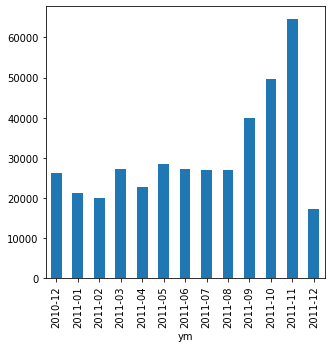

In [69]:
retail_df.groupby(['ym'])['InvoiceNo'].count().plot.bar(figsize=(5,5))

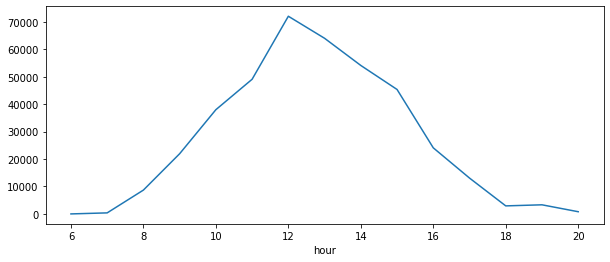

In [70]:
retail_df.groupby(['hour'])['InvoiceNo'].count().plot(figsize=(10,4))

In [71]:
item_statistics = pd.DataFrame({
    'num_buys' : retail_df.groupby('StockCode')['CustomerID'].count(),
    'num_users' : retail_df.groupby('StockCode')['CustomerID'].nunique()
}).reset_index()

item_statistics.head()

,StockCode,num_buys,num_users
0,10002,49,40
1,10080,21,19
2,10120,30,25
3,10123C,3,3
4,10124A,5,5


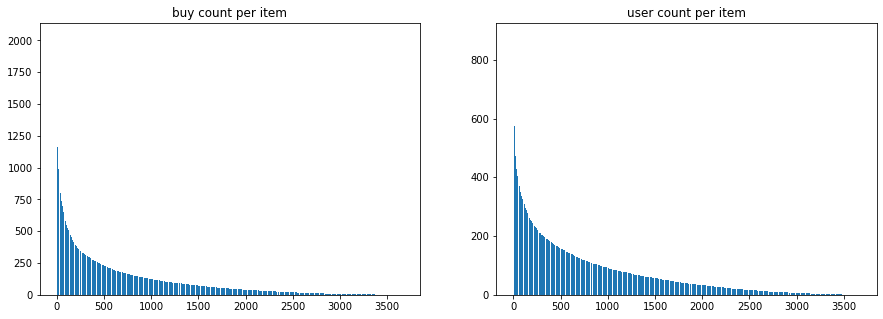

In [78]:
# item 별 구매수 / 구매자 수 분포
item_num_buys = item_statistics.sort_values(by='num_buys', ascending=False).reset_index()
item_num_users = item_statistics.sort_values(by='num_users', ascending=False).reset_index()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(item_num_buys.index, item_num_buys['num_buys'])
plt.title('buy count per item')

plt.subplot(1,2,2)
plt.bar(item_num_users.index, item_num_users['num_users'])
plt.title('user count per item')
plt.show()

## Popularity 기반 Top K 추천

In [79]:
# 가장 많이 산 아이템 Top10
item_statistics.sort_values(by='num_buys', ascending=False)[:10]
# item_statistics.sort_values(by='num_users', ascending = False)[:10]

,StockCode,num_buys,num_users
3233,85123A,2035,856
1288,22423,1724,881
3219,85099B,1618,635
3059,84879,1408,678
2593,47566,1397,708
170,20725,1317,532
1570,22720,1159,640
172,20727,1105,458
3664,POST,1099,331
2033,23203,1098,505


In [82]:
# Country 별 많이 조회된 인기 Top-10
for country in retail_df['Country'].unique():
  temp = retail_df[retail_df['Country'] == country]
  temp_stats = pd.DataFrame({
      'num_buys' : temp.groupby('StockCode')['CustomerID'].count(),
      'num_users' : temp.groupby('StockCode')['CustomerID'].nunique()
  }).reset_index()

  print('Country', country, 'Top-10')
  print('\n', temp_stats.sort_values(by='num_buys', ascending=False)[:10], '\n')

Country United Kingdom Top-10

      StockCode  num_buys  num_users
3229    85123A      1947        821
3215    85099B      1464        562
1286     22423      1426        767
3056     84879      1333        642
2591     47566      1308        659
169      20725      1147        454
171      20727      1049        426
1568     22720      1020        569
2031     23203       999        455
1252     22383       996        390 

Country France Top-10

      StockCode  num_buys  num_users
1521      POST       300         72
1032     23084        73         29
315      21731        70         25
694      22554        68         29
696      22556        66         24
550      22326        62         25
57       20725        60         23
567      22352        56         19
111      21086        54         23
62       20750        54         26 

Country Australia Top-10

     StockCode  num_buys  num_users
295     22720         9          2
90      21731         9          3
13      20725   

## Time decay를 적용한 Popularity

In [88]:
# 단순히 그동안 일어난 구매횟수를 더하는게 아닌, 추천을 수행하는 시간 기준으로 오래된 구매일수록 decay 적용
# 추천을 제공하는 날짜가 2012-01-01이라고 가정
recomm_time = pd.Timestamp(year=2012, month=1, day=1)
month_param = 0.95
day_param = 0.995

retail_df['decayMorth'] = month_param ** ((recomm_time - retail_df['InvoiceDate']).dt.days/30)
retail_df['decayDay'] = day_param ** ((recomm_time - retail_df['InvoiceDate']).dt.days)

retail_df[retail_df['ym'] == '2011-12'].head()
# retail_df[retail_df.ym =='2010-12'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ym,hour,decayMonth,decayDay,decayMorth
516403,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,2011-12-01 08:33:00,1.65,15687.0,United Kingdom,2011-12,8,0.95,0.860384,0.95
516404,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2011-12-01 08:33:00,5.95,15687.0,United Kingdom,2011-12,8,0.95,0.860384,0.95
516405,579899,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,2011-12-01 08:33:00,3.75,15687.0,United Kingdom,2011-12,8,0.95,0.860384,0.95
516406,579899,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-01 08:33:00,2.89,15687.0,United Kingdom,2011-12,8,0.95,0.860384,0.95
516407,579899,71477,COLOURED GLASS STAR T-LIGHT HOLDER,4,2011-12-01 08:33:00,3.95,15687.0,United Kingdom,2011-12,8,0.95,0.860384,0.95


In [89]:
item_statistics = pd.DataFrame({
    'num_buys' : retail_df.groupby('StockCode')['InvoiceDate'].count(),
    'num_buys_decay_month' : retail_df.groupby('StockCode')['decayMonth'].sum(), 
    'num_buys_decay_day' : retail_df.groupby('StockCode')['decayDay'].sum()
  }).reset_index()

item_statistics.head()

,StockCode,num_buys,num_buys_decay_month,num_buys_decay_day
0,10002,49,27.327934,8.972876
1,10080,21,17.433479,12.526036
2,10120,30,22.754610,14.838481
3,10123C,3,1.732293,0.611511
4,10124A,5,3.227024,1.577619


In [94]:
# 가장 많이 구매된 아이템 Top 10
# stockCode: 47566, 20725의 경우 decay 점수를 적용하면 추천 순서가 달라진다.

#item_statistics.sort_values(by='num_buys', ascending = False)[:10]
#item_statistics.sort_values(by='num_buys_decay_month', ascending = False)[:10]
item_statistics.sort_values(by='num_buys_decay_day', ascending = False)[:10]

,StockCode,num_buys,num_buys_decay_month,num_buys_decay_day
3233,85123A,2035,1455.381949,844.381886
3219,85099B,1618,1210.922568,750.774234
1288,22423,1724,1237.365308,717.027522
985,22086,1019,855.166283,654.061759
3059,84879,1408,1046.645812,646.264649
2033,23203,1098,887.730398,608.758673
1919,23084,842,740.072077,594.450752
170,20725,1317,970.775197,581.563758
2593,47566,1397,1007.971560,568.718838
2039,23209,1029,823.387748,553.773448
